In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv(r"C:\Users\afshana\OneDrive\ドキュメント\AI\ML-Assessment\dataset-2.csv")

In [20]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,target
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1030 non-null   float64
 1   x2      1030 non-null   float64
 2   x3      1030 non-null   float64
 3   x4      1030 non-null   float64
 4   x5      1030 non-null   float64
 5   x6      1030 non-null   float64
 6   x7      1030 non-null   float64
 7   x8      1030 non-null   int64  
 8   target  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [22]:
data.duplicated().sum()

np.int64(25)

In [23]:
data.drop_duplicates(inplace  = True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1005 non-null   float64
 1   x2      1005 non-null   float64
 2   x3      1005 non-null   float64
 3   x4      1005 non-null   float64
 4   x5      1005 non-null   float64
 5   x6      1005 non-null   float64
 6   x7      1005 non-null   float64
 7   x8      1005 non-null   int64  
 8   target  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [26]:
data.reset_index(drop = True, inplace = True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1005 non-null   float64
 1   x2      1005 non-null   float64
 2   x3      1005 non-null   float64
 3   x4      1005 non-null   float64
 4   x5      1005 non-null   float64
 5   x6      1005 non-null   float64
 6   x7      1005 non-null   float64
 7   x8      1005 non-null   int64  
 8   target  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 70.8 KB


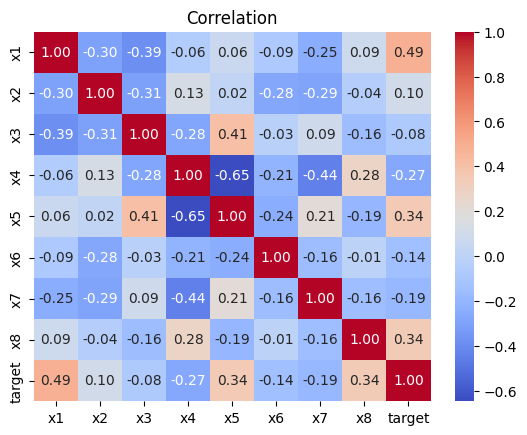

In [28]:
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', fmt ='.2f')
plt.title('Correlation')
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [68]:
features = data.drop('target', axis = 1)
label = data['target']

In [69]:
x_train,x_test, y_train, y_test = train_test_split(features , label, test_size = 0.2, random_state = 27)

In [70]:
scale = StandardScaler()
x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.transform(x_test)

In [71]:
model = LinearRegression()
model.fit(x_train_scale,y_train)

LinearRegression()

In [72]:
mse = mean_squared_error(y_test, model.predict(x_test_scale))
r2 = r2_score(y_test, model.predict(x_test_scale))
print("MSE =", mse)
print("R2 Score =", r2)

MSE = 106.76439573974302
R2 Score = 0.5845507523316011


In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf_model = RandomForestRegressor(n_estimators = 250, random_state = 49)

In [75]:
rf_model.fit(x_train_scale, y_train)

RandomForestRegressor(n_estimators=250, random_state=49)

In [76]:
rf_mse = mean_squared_error(y_test, rf_model.predict(x_test_scale))
rf_r2 = r2_score(y_test, rf_model.predict(x_test_scale))
rf_mae = mean_absolute_error(y_test, rf_model.predict(x_test_scale))
print("Random Forest MSE =", rf_mse)
print("Random ForestMAE = ", rf_mae)
print("Random Forest R2 Score =", rf_r2)

Random Forest MSE = 23.1122541159907
Random ForestMAE =  3.3986466183368838
Random Forest R2 Score = 0.9100639448396666


In [77]:
import xgboost as xgb

In [78]:
XGB_model = xgb.XGBRegressor(n_estimators = 200, learning_rate = 0.1, random_state = 28)

In [79]:
XGB_model.fit(x_train_scale, y_train);

In [80]:
xgb_mse = mean_squared_error(y_test, XGB_model.predict(x_test_scale))
xgb_r2 = r2_score(y_test, XGB_model.predict(x_test_scale))
xgb_mae = mean_absolute_error(y_test, XGB_model.predict(x_test_scale))
print("XGBoost MAE =", xgb_mae)
print("XGBoost MSE =", xgb_mse)
print("XGBoost R2 Score =", xgb_r2)

XGBoost MAE = 2.989002323530207
XGBoost MSE = 20.028247517127948
XGBoost R2 Score = 0.9220646517459763


In [173]:
import joblib
joblib.dump(XGB_model, 'XGB_model.pkl')

['XGB_model.pkl']

In [175]:
import joblib
joblib.dump(scale, 'scaler.pkl')

['scaler.pkl']

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1005 non-null   float64
 1   x2      1005 non-null   float64
 2   x3      1005 non-null   float64
 3   x4      1005 non-null   float64
 4   x5      1005 non-null   float64
 5   x6      1005 non-null   float64
 6   x7      1005 non-null   float64
 7   x8      1005 non-null   int64  
 8   target  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 70.8 KB


In [181]:
import joblib
import numpy as np

def predict_target():
    model = joblib.load('xgb_model.pkl')
    scaler = joblib.load('scaler.pkl')
    x1 = float(input("Enter x1: "))
    x2 = float(input("Enter x2: "))
    x3 = float(input("Enter x3: "))
    x4 = float(input("Enter x4: "))
    x5 = float(input("Enter x5: "))
    x6 = float(input("Enter x6: "))
    x7 = float(input("Enter x7: "))
    x8 = float(input("Enter x8: "))

    input_data = np.array([[x1, x2, x3, x4, x5, x6, x7,x8]])
    
    input_scaled = scaler.transform(input_data)

    prediction = model.predict(input_scaled)
    print(f"Predicted target: {prediction[0]}")
    return prediction[0]

predict_target()

Predicted target: 63.668113708496094


c:\Users\afshana\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float32(63.668114)